<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/Q1_Q2_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Models for Q1:**
#Addressing Question 1: Are WHD more effective when women or men are running them, with effectiveness indicated by actions (FIR, DIR, arrests) and lessening of CAW?

FIR = First Information Reports

DIR = Domestic Incidence Reports

CAW = Crimes Against Women

#Chose a linear regression model to show relationships between mean station-level reports and whether or not there is a statistical difference between woman-run or regular WHD.

**Further down the document, see Models for Q2.**

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Add a special library for working with tables:
from tabulate import tabulate
# Let's install "forestplot", which contains some nice code for making coefficient plots
!pip install forestplot
# Then, let's import the library
import forestplot as fp


### Reading in the data
First mount the google drive;
The data is in csv format and stored in "Colab Notebooks/Final Project/Data/". Import the data into a dataframe named `admin_wide_cleaned_data`.

In [ ]:
# the code below allows you to access Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file contains admin_wide_data with dropped columns and checked for no missing values
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/admin_wide_station_level_means_data.csv"


# Read the CSV file into a dataframe
admin_data = pd.read_csv(inputfile1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Remove control row (which has no whd run by either men or women) to focus on the research question.

In [ ]:
# Create a boolean mask for rows where both columns are 0
mask = (admin_data['regular_whd'] == 0) & (admin_data['women_whd'] == 0)

# Apply the inverted mask to filter admin_wide_cleaned_data
filtered_data = admin_data[~mask]

After removing control rows, make sure the resulting value counts are expected for regular_whd and women_whd.

In [ ]:
filtered_data['regular_whd'].value_counts()

,count
regular_whd,
1.0,61
0.0,59


In [ ]:
filtered_data['women_whd'].value_counts()

,count
women_whd,
0.0,61
1.0,59


In [ ]:
filtered_data.shape

(120, 10)

In [ ]:

from sklearn.linear_model import LinearRegression


In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_caw_rate']
from sklearn.model_selection import train_test_split


In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 0.10883036415254238
Mean of zeros: 0.06267096704918032
Difference in means: 0.04615939710336206


Intercept: 0.06267096704918032
Coefficient: [0.0461594]


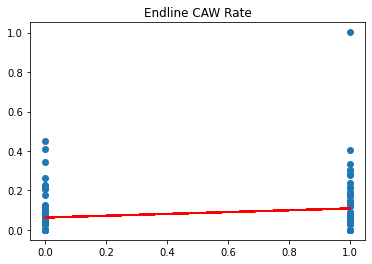

In [ ]:

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline CAW Rate")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

import statsmodels.api as sm

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             e_caw_rate   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.622
Date:                Sun, 17 Nov 2024   Prob (F-statistic):             0.0595
Time:                        00:07:35   Log-Likelihood:                 72.982
No. Observations:                 120   AIC:                            -142.0
Df Residuals:                     118   BIC:                            -136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0627      0.017      3.685      0.0

#The mean of reported CAW at women-run WHD (0.063) is slightly higher (0.046 coefficient) than regular WHD.
#Since the p-value is 0.059, there is no statistical difference in CAW reports between woman-run and regular WHD.

In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_fir_overall_count']

In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 33.58050847457627
Mean of zeros: 32.36065573770492
Difference in means: 1.2198527368713528


Intercept: 32.36065573770492
Coefficient: [1.21985274]


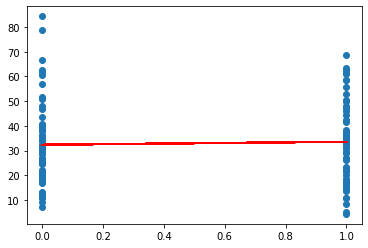

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     e_fir_overall_count   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.007
Method:                  Least Squares   F-statistic:                    0.1626
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):              0.688
Time:                         00:07:36   Log-Likelihood:                -506.16
No. Observations:                  120   AIC:                             1016.
Df Residuals:                      118   BIC:                             1022.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3607      2.121     15.25

#The mean of overall FIR at women-run WHD (32.36) is slightly higher (1.22 coefficient) than regular WHD.
#With a p-value of 0.688, there is no statistically significant difference in overall FIR between woman-run and regular WHD.

In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_fir_caw_count']

In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 4.970338983050848
Mean of zeros: 4.098360655737705
Difference in means: 0.8719783273131432


Intercept: 4.0983606557377055
Coefficient: [0.87197833]


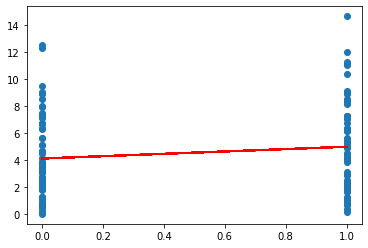

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        e_fir_caw_count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.187
Date:                Sun, 17 Nov 2024   Prob (F-statistic):              0.142
Time:                        00:07:36   Log-Likelihood:                -309.93
No. Observations:                 120   AIC:                             623.9
Df Residuals:                     118   BIC:                             629.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0984      0.413      9.913      0.0

#The mean of FIR CAW reports at women-run WHD (4.1) is slightly higher (0.87 coefficient) than regular WHD.
#With a p-value of 0.142, there is no statistically significant difference in FIR CAW reports between woman-run and regular WHD.

In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_fir_bywomen_count']

In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 3.125
Mean of zeros: 2.7151639344262297
Difference in means: 0.4098360655737703


Intercept: 2.7151639344262293
Coefficient: [0.40983607]


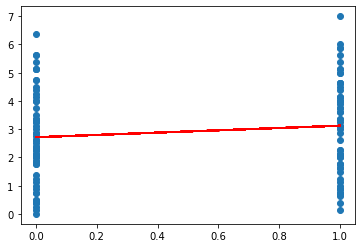

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     e_fir_bywomen_count   R-squared:                       0.016
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     1.877
Date:                 Sun, 17 Nov 2024   Prob (F-statistic):              0.173
Time:                         00:07:36   Log-Likelihood:                -228.51
No. Observations:                  120   AIC:                             461.0
Df Residuals:                      118   BIC:                             466.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7152      0.210     12.94

#The mean of FIR CAW reports by women at women-run WHD (2.72) is slightly higher (0.41 coefficient) than regular WHD.
#With a p-value of 0.173, there is no statistically significant difference in FIR CAW reports by women between woman-run and regular WHD.

In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_arrest_count']

In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 4.120762711864407
Mean of zeros: 3.6045081967213113
Difference in means: 0.5162545151430953


Intercept: 3.6045081967213113
Coefficient: [0.51625452]


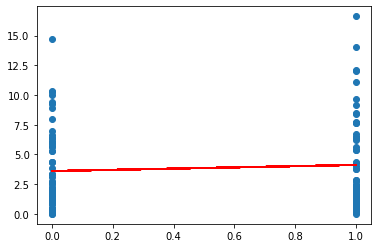

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         e_arrest_count   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6299
Date:                Sun, 17 Nov 2024   Prob (F-statistic):              0.429
Time:                        00:07:37   Log-Likelihood:                -321.71
No. Observations:                 120   AIC:                             647.4
Df Residuals:                     118   BIC:                             653.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6045      0.456      7.903      0.0


#The mean of arrests as a result of women-run WHD (3.6) is slightly higher (0.52 coefficient) than regular WHD.
#With a p-value of 0.429, there is no statistically significant difference in arrests between woman-run and regular WHD.

In [ ]:
x = filtered_data[['women_whd']]
y = filtered_data ['e_dir_count']

In [ ]:
mean_ones = y[x['women_whd'] == 1].mean()
mean_zeros = y[x ['women_whd']== 0].mean()
diff_means = mean_ones - mean_zeros

print("Mean of ones:", mean_ones)
print("Mean of zeros:", mean_zeros)
print("Difference in means:", diff_means)

Mean of ones: 0.885593220338983
Mean of zeros: 0.9057377049180327
Difference in means: -0.020144484579049715


Intercept: 0.9057377049180328
Coefficient: [-0.02014448]


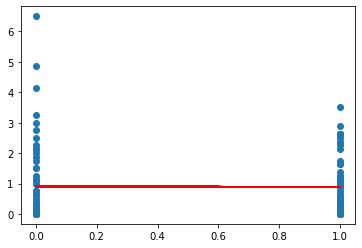

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            e_dir_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.009217
Date:                Sun, 17 Nov 2024   Prob (F-statistic):              0.924
Time:                        00:07:37   Log-Likelihood:                -185.94
No. Observations:                 120   AIC:                             375.9
Df Residuals:                     118   BIC:                             381.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9057      0.147      6.156      0.0

#The mean of DIR at women-run WHD (0.91) is negligibly lower (-0.02 coefficient) than regular WHD.
#With a p-value of 0.924, there is no statistically significant difference in DIR between woman-run and regular WHD.

**These statistics seem to say that there is no statistically significant advantage to woman-run WHD versus regular WHD (run by women or men).**
The original paper agrees that there is no statistical difference in DIR and arrests between woman-run and regular WHD.
However, the original paper wrote that FIR in CAW cases by women was statistically significant (p=.03, .06). This may require further digging to sort out.
However, in the tables in the original paper (on p 4, Fig. 2), the bins are far apart, making it appear that the differences are larger between woman-run and regular WHD and yet have the same numbers. We ran into the same issue in our tables, but this still does not explain the statistical discrepancies.  






# **Models for Q2:**
##Addressing Question 2: How much does a WHD in a police station promote the reporting of GBV compared to a police station with no WHD?

GBV = Gender-Based Violence

Separate treatment and control. Then, randomly subtract half from both women_whd and regular_whd and add the remainder together. Compare this to control.
This is because the question involves having a WHD (any type) vs not having a WHD.

In [ ]:
#asked Gemini for starters on this paragraph of code:
#Separate treatment and control groups:
treatment_data = admin_data[admin_data['treatment'] == 'Treatment']
control_data = admin_data[admin_data['treatment'] == 'Control']

#Calculate the number of rows to remove from treatment_data:
num_rows_to_remove = len(treatment_data) // 2

#Randomly select indices to drop:
indices_to_drop = treatment_data.sample(n=num_rows_to_remove, random_state=42).index

#Drop the selected rows from treatment_data:
treatment_data = treatment_data.drop(indices_to_drop)

#Check - should be 60
treatment_data.shape
#treatment_data.value_counts()

In [ ]:
#Calculate the sum of 'e_caw_rate' for combined_sample and control_data
control_e_caw_rate = control_data['e_caw_rate'].sum()
treatment_e_caw_rate = treatment_data['e_caw_rate'].sum()

print("Control Group:")
print(control_e_caw_rate)
print("\nTreatment Group:")
print(treatment_e_caw_rate)

In [ ]:
x = control_data[['e_caw_rate']]
y = treatment_data [['e_caw_rate']]

In [ ]:
mean_treatment = y.mean()
mean_control = x.mean()
diff_means = mean_treatment - mean_control

print("Mean of Treatment:", mean_treatment)
print("Mean of Control:", mean_control)
print("Difference in means:", diff_means)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline CAW Rate")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)
# Reset the indices of both x and y to ensure they are aligned
# Before fitting the model.
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

#The mean of CAW rates at stations with a WHD (0.065) is slightly lower (0.13 coefficient) than without a WHD.
With a p-value of 0.310, there is no statistically significant difference in CAW reports between stations with and without WHD.

In [ ]:

control_e_dir_count = control_data['e_dir_count'].sum()
treatment_e_dir_count = treatment_data['e_dir_count'].sum()

print("Control Group:")
print(control_e_dir_count)
print("\nTreatment Group:")
print(treatment_e_dir_count)

In [ ]:
x = control_data[['e_dir_count']]
y = treatment_data [['e_dir_count']]

In [ ]:
mean_treatment = y.mean()
mean_control = x.mean()
diff_means = mean_treatment - mean_control

print("Mean of Treatment:", mean_treatment)
print("Mean of Control:", mean_control)
print("Difference in means:", diff_means)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline DIR Count")
plt.xlabel("Control Stations") # Add X-axis label
plt.ylabel("Treatment Stations")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)
# Reset the indices of both x and y to ensure they are aligned
# Before fitting the model.
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

#The mean of DIR at stations with a WHD (0.84) is slightly higher (-0.38 coefficient) than without a WHD.
With a p-value of 0.310, there is no statistically significant difference in DIR between stations with and without WHD.

In [ ]:

control_e_arrest_count = control_data['e_arrest_count'].sum()
treatment_e_arrest_count = treatment_data['e_arrest_count'].sum()

print("Control Group:")
print(control_e_arrest_count)
print("\nTreatment Group:")
print(treatment_e_arrest_count)

In [ ]:
x = control_data[['e_arrest_count']]
y = treatment_data [['e_arrest_count']]

In [ ]:
mean_treatment = y.mean()
mean_control = x.mean()
diff_means = mean_treatment - mean_control

print("Mean of Treatment:", mean_treatment)
print("Mean of Control:", mean_control)
print("Difference in means:", diff_means)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline Arrest Count")
plt.xlabel("Control Stations") # Add X-axis label
plt.ylabel("Treatment Stations")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)
# Reset the indices of both x and y to ensure they are aligned
# Before fitting the model.
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

The mean of arrests at stations with a WHD (3.9) is slightly higher (-0.07 coefficient) than without a WHD.
With a p-value of 0.611, there is no statistically significant difference in arrests between stations with and without WHD.

In [ ]:


control_e_fir_bywomen_count = control_data['e_fir_bywomen_count'].sum()
treatment_e_fir_bywomen_count = treatment_data['e_fir_bywomen_count'].sum()

print("Control Group:")
print(control_e_fir_bywomen_count)
print("\nTreatment Group:")
print(treatment_e_fir_bywomen_count)

In [ ]:
x = control_data[['e_fir_bywomen_count']]
y = treatment_data [['e_fir_bywomen_count']]

In [ ]:
mean_treatment = y.mean()
mean_control = x.mean()
diff_means = mean_treatment - mean_control

print("Mean of Treatment:", mean_treatment)
print("Mean of Control:", mean_control)
print("Difference in means:", diff_means)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline FIR by Women Count")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)
# Reset the indices of both x and y to ensure they are aligned
# Before fitting the model.
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

The mean of FIR by women at stations without a WHD (2.76) is slightly lower (0.02 coefficient) than with a WHD.
With a p-value of 0.904, there is no statistically significant difference in FIR by women between stations with and without WHD.

In [ ]:

control_e_fir_overall_count = control_data['e_fir_overall_count'].sum()
treatment_e_fir_overall_count = treatment_data['e_fir_overall_count'].sum()

print("Control Group:")
print(control_e_fir_overall_count)
print("\nTreatment Group:")
print(treatment_e_fir_overall_count)

In [ ]:
x = control_data[['e_fir_overall_count']]
y = treatment_data [['e_fir_overall_count']]

In [ ]:
mean_treatment = y.mean()
mean_control = x.mean()
diff_means = mean_treatment - mean_control

print("Mean of Treatment:", mean_treatment)
print("Mean of Control:", mean_control)
print("Difference in means:", diff_means)

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Scatterplot of the data with the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Endline FIR Overall Count")
plt.xlabel("Control Stations")
plt.ylabel("Treatment Stations")
plt.title("Endline FIR Overall Count")
plt.show()

In [ ]:
# Fit a regression using statsmodels for y on x

# Add a constant to the independent variable
x = sm.add_constant(x)
# Reset the indices of both x and y to ensure they are aligned
# Before fitting the model.
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

#The mean of FIR overall count at stations without a WHD (24.43) is lower (0.23 coefficient) than with a WHD.
#With a p-value of 0.02, there is a definite statistically significant difference in FIR overall count between stations with and without WHD.

In [ ]:
columns_to_compare = ['e_fir_caw_count', 'e_fir_overall_count', 'e_fir_bywomen_count', 'e_dir_count', 'e_arrest_count']

treatment_data['control'] = 0
control_data['control'] = 1

grouped_data = pd.concat([treatment_data, control_data]).groupby('control')[columns_to_compare].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x = grouped_data['control']

for i, column in enumerate(columns_to_compare):
    ax.bar(x.index + i * width, grouped_data[column], width, label=column)

ax.set_xlabel('Treatment (0) Vs Control Stations (1)')
ax.set_ylabel('Count')
ax.set_title('Comparing Endline FIR, DIR, Arrests from Control Vs Treatment')
ax.set_xticks(x.index + width)
ax.set_xticklabels(x)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()